In [1]:
import pandas as pd
import numpy as np

# Tratamento de dados

### Mescla de datasets, criação de dummies e tratamento de dados.

Importando e ajustando o dataset já tratado por mim de personagens e suas respectivas classes.
Importando o dataset de jogadores associados às personagens e mesclando com o anterior.

In [2]:
df_champions = pd.read_csv('data/champsclass.csv', index_col='id')
df_champions.head()

,name,class1,class2,class3
id,,,,
24,Jax,Skirmisher,NaN,NaN
37,Sona,Enchanter,NaN,NaN
18,Tristana,Marksman,NaN,NaN
110,Varus,Artillery,Marksman,NaN
114,Fiora,Skirmisher,NaN,NaN


In [3]:
df_champions.fillna('',inplace=True)

In [4]:
df_champions['classes'] = df_champions['class1']+'-'+df_champions['class2']+'-'+df_champions['class3']
df_champions.head()

,name,class1,class2,class3,classes
id,,,,,
24,Jax,Skirmisher,,,Skirmisher--
37,Sona,Enchanter,,,Enchanter--
18,Tristana,Marksman,,,Marksman--
110,Varus,Artillery,Marksman,,Artillery-Marksman-
114,Fiora,Skirmisher,,,Skirmisher--


In [5]:
names = list(df_champions['name'].sort_values().unique())

In [6]:
championsdata = df_champions.join(df_champions['classes'].str.get_dummies(sep='-')).drop(columns=['class1',
                                                                                                  'class2',
                                                                                                  'class3',
                                                                                                  'classes'])
championsdata.head()

,name,Artillery,Assassin,Battlemage,Burst,Catcher,Diver,Enchanter,Juggernaut,Marksman,Skirmisher,Specialist,Vanguard,Warden
id,,,,,,,,,,,,,,
24,Jax,0,0,0,0,0,0,0,0,0,1,0,0,0
37,Sona,0,0,0,0,0,0,1,0,0,0,0,0,0
18,Tristana,0,0,0,0,0,0,0,0,1,0,0,0,0
110,Varus,1,0,0,0,0,0,0,0,1,0,0,0,0
114,Fiora,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
df_participants = pd.read_csv('data/participants.csv', index_col='id')
df_participants.head()

/usr/local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,matchid,player,championid,ss1,ss2,role,position
id,,,,,,,
9,10,1,19,4,11,NONE,JUNGLE
10,10,2,267,3,4,DUO_SUPPORT,BOT
11,10,3,119,7,4,DUO_CARRY,BOT
12,10,4,114,12,4,SOLO,TOP
13,10,5,112,4,3,SOLO,MID


Importando e concatenando os datasets de informações de jogo para cada jogador em cada partida e selecionando apenas a coluna de vitória para então mesclar com o dataset anterior.

In [8]:
df_participants_stats = pd.concat([pd.read_csv('data/stats1.csv', index_col='id')['win'],
                                   pd.read_csv('data/stats2.csv', index_col='id')['win']])
df_participants_stats.to_frame().head()

/usr/local/Cellar/ipython/7.7.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,win
id,
9,0
10,0
11,0
12,0
13,0


In [9]:
df_participants = df_participants.join(df_participants_stats)
df_participants.head()

,matchid,player,championid,ss1,ss2,role,position,win
id,,,,,,,,
9,10,1,19,4,11,NONE,JUNGLE,0.0
10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0
11,10,3,119,7,4,DUO_CARRY,BOT,0.0
12,10,4,114,12,4,SOLO,TOP,0.0
13,10,5,112,4,3,SOLO,MID,0.0


Associando a cada jogador o time ao qual faz parte e criando uma chave única para partida e time.

In [10]:
playerdata = df_participants.join(championsdata, on='championid').drop(columns=['ss1', 'ss2',
                                                                                'role', 'position'])
playerdata.head()

,matchid,player,championid,win,name,Artillery,Assassin,Battlemage,Burst,Catcher,Diver,Enchanter,Juggernaut,Marksman,Skirmisher,Specialist,Vanguard,Warden
id,,,,,,,,,,,,,,,,,,
9,10,1,19,0.0,Warwick,0,0,0,0,0,1,0,0,0,0,0,0,0
10,10,2,267,0.0,Nami,0,0,0,0,0,0,1,0,0,0,0,0,0
11,10,3,119,0.0,Draven,0,0,0,0,0,0,0,0,1,0,0,0,0
12,10,4,114,0.0,Fiora,0,0,0,0,0,0,0,0,0,1,0,0,0
13,10,5,112,0.0,Viktor,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
playerdata['teamid'] = playerdata['player'].apply(lambda x: 200 if x > 5 else 100)
playerdata['absid'] = playerdata['matchid'].apply(lambda x: str(x))+playerdata['teamid'].apply(lambda x: str(x))
playerdata['absid'] = playerdata['absid'].apply(lambda x: int(x))
playerdata.head()

,matchid,player,championid,win,name,Artillery,Assassin,Battlemage,Burst,Catcher,Diver,Enchanter,Juggernaut,Marksman,Skirmisher,Specialist,Vanguard,Warden,teamid,absid
id,,,,,,,,,,,,,,,,,,,,
9,10,1,19,0.0,Warwick,0,0,0,0,0,1,0,0,0,0,0,0,0,100,10100
10,10,2,267,0.0,Nami,0,0,0,0,0,0,1,0,0,0,0,0,0,100,10100
11,10,3,119,0.0,Draven,0,0,0,0,0,0,0,0,1,0,0,0,0,100,10100
12,10,4,114,0.0,Fiora,0,0,0,0,0,0,0,0,0,1,0,0,0,100,10100
13,10,5,112,0.0,Viktor,0,0,1,0,0,0,0,0,0,0,0,0,0,100,10100


Criando o dataset de dados para cada time que consiste no agrupamento pela chave única criada no passo anterior.

In [12]:
teamdata = playerdata.groupby('absid').sum().drop(columns=['matchid', 'player', 'championid', 'teamid'])
teamdata.head()

,win,Artillery,Assassin,Battlemage,Burst,Catcher,Diver,Enchanter,Juggernaut,Marksman,Skirmisher,Specialist,Vanguard,Warden
absid,,,,,,,,,,,,,,
10100,0.0,0,0,1,0,0,1,1,0,1,1,0,0,0
10200,5.0,1,1,0,1,0,1,0,0,1,0,0,0,1
11100,0.0,1,1,1,1,0,0,0,0,0,1,0,0,0
11200,5.0,0,0,0,2,0,2,0,0,1,0,0,0,0
12100,0.0,1,0,0,1,1,0,1,0,2,0,0,1,0


Importando o dataset de informações do jogo para cada time, criando a chave de identificação e mesclando com o dataset de dados para cada time.

In [13]:
df_teamstats = pd.read_csv('data/teamstats.csv')
df_teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [14]:
df_teamstats['absid'] = df_teamstats['matchid'].apply(lambda x: str(x))+df_teamstats['teamid'].apply(lambda x: str(x))
df_teamstats['absid'] = df_teamstats['absid'].apply(lambda x: int(x))
df_teamstats.set_index('absid', inplace=True)
df_teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
absid,,,,,,,,,,,,,
10100,10,100,0,1,0,0,0,0,5,0,0,0,0
10200,10,200,1,0,1,1,1,1,10,3,1,3,1
11100,11,100,1,0,0,0,0,0,2,0,0,0,0
11200,11,200,0,1,1,0,1,0,10,3,0,2,0
12100,12,100,1,0,0,0,0,0,1,0,0,0,0


In [15]:
teamdata = teamdata.join(df_teamstats.drop(columns=['matchid', 'teamid']))
teamdata.head()

,win,Artillery,Assassin,Battlemage,Burst,Catcher,Diver,Enchanter,Juggernaut,Marksman,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
absid,,,,,,,,,,,,,,,,,,,,,
10100,0.0,0,0,1,0,0,1,1,0,1,...,1,0,0,0,0,5,0,0,0,0
10200,5.0,1,1,0,1,0,1,0,0,1,...,0,1,1,1,1,10,3,1,3,1
11100,0.0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
11200,5.0,0,0,0,2,0,2,0,0,1,...,1,1,0,1,0,10,3,0,2,0
12100,0.0,1,0,0,1,1,0,1,0,2,...,0,0,0,0,0,1,0,0,0,0


Tratando os dados e dividindo as colunas em categorias.

In [16]:
teamdata.columns = [col_name.lower() for col_name in teamdata.columns]

In [17]:
classes = ['artillery', 'assassin', 'battlemage', 'burst', 'catcher', 'diver', 'enchanter', 'juggernaut',
           'marksman', 'skirmisher', 'specialist', 'vanguard', 'warden']
attributes = ['firstblood', 'firsttower', 'firstinhib', 'firstbaron', 'firstdragon', 'firstharry']
totals = ['towerkills', 'inhibkills', 'baronkills', 'dragonkills', 'harrykills']

for item in classes:
    teamdata[item] = teamdata[item].apply(lambda x: 1 if x > 0 else 0)

teamdata['win'] = teamdata['win'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
teamdata.head()

,win,artillery,assassin,battlemage,burst,catcher,diver,enchanter,juggernaut,marksman,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
absid,,,,,,,,,,,,,,,,,,,,,
10100,0,0,0,1,0,0,1,1,0,1,...,1,0,0,0,0,5,0,0,0,0
10200,1,1,1,0,1,0,1,0,0,1,...,0,1,1,1,1,10,3,1,3,1
11100,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
11200,1,0,0,0,1,0,1,0,0,1,...,1,1,0,1,0,10,3,0,2,0
12100,0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


# Visualização de Dados

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

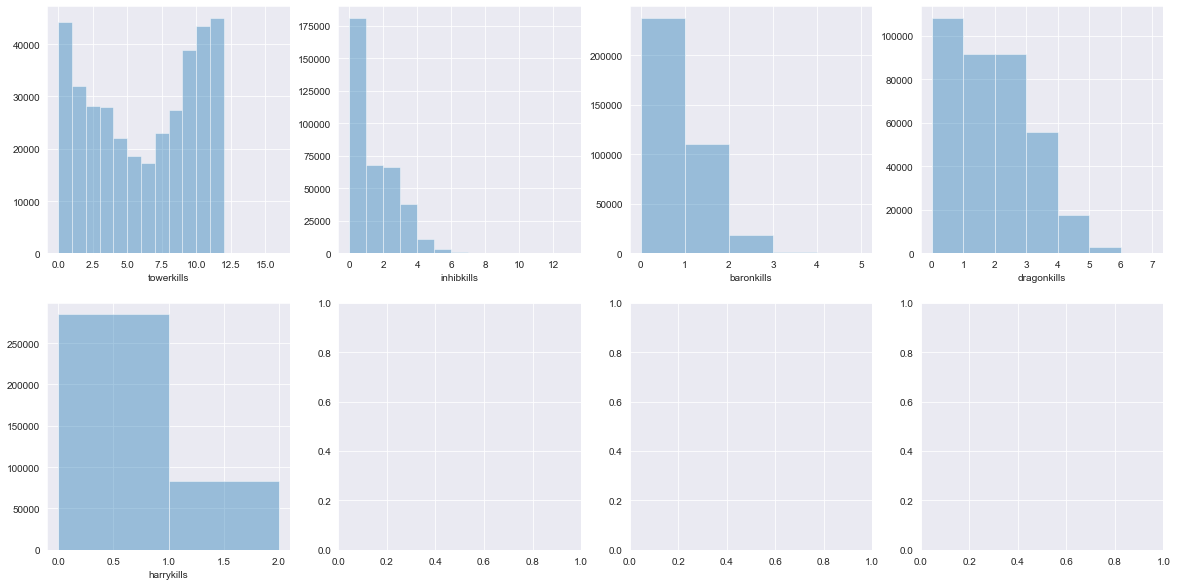

In [20]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
j = 0
i = 0
bins = [16, 13, 5, 7, 2]
for item in totals:
    sns.distplot(teamdata[item], bins=bins[i], kde=False, ax=ax[k][j]);
    j += 1
    i += 1
    if j == 4:
        k += 1
        j = 0

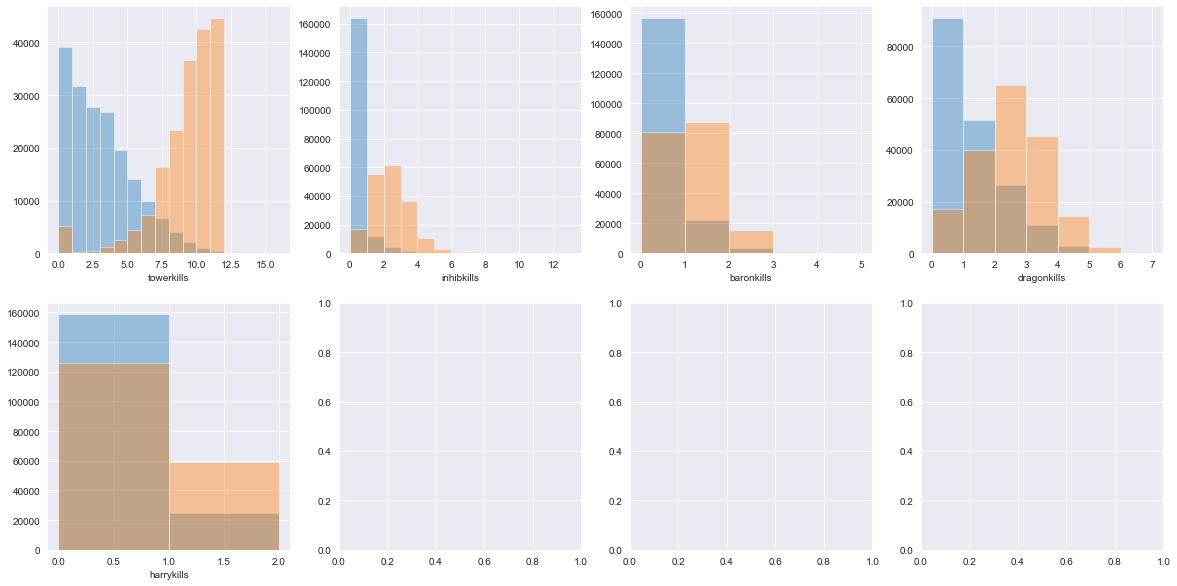

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
j = 0
i = 0
bins = [(15, 16), (10, 13), (5, 5), (7, 7), (2, 2)]
for item in totals:
    sns.distplot(teamdata[teamdata['win'] == 0][item], bins=bins[i][0], kde=False, ax=ax[k][j])
    sns.distplot(teamdata[teamdata['win'] == 1][item], bins=bins[i][1], kde=False, ax=ax[k][j]);
    j += 1
    i += 1
    if j == 4:
        k += 1
        j = 0

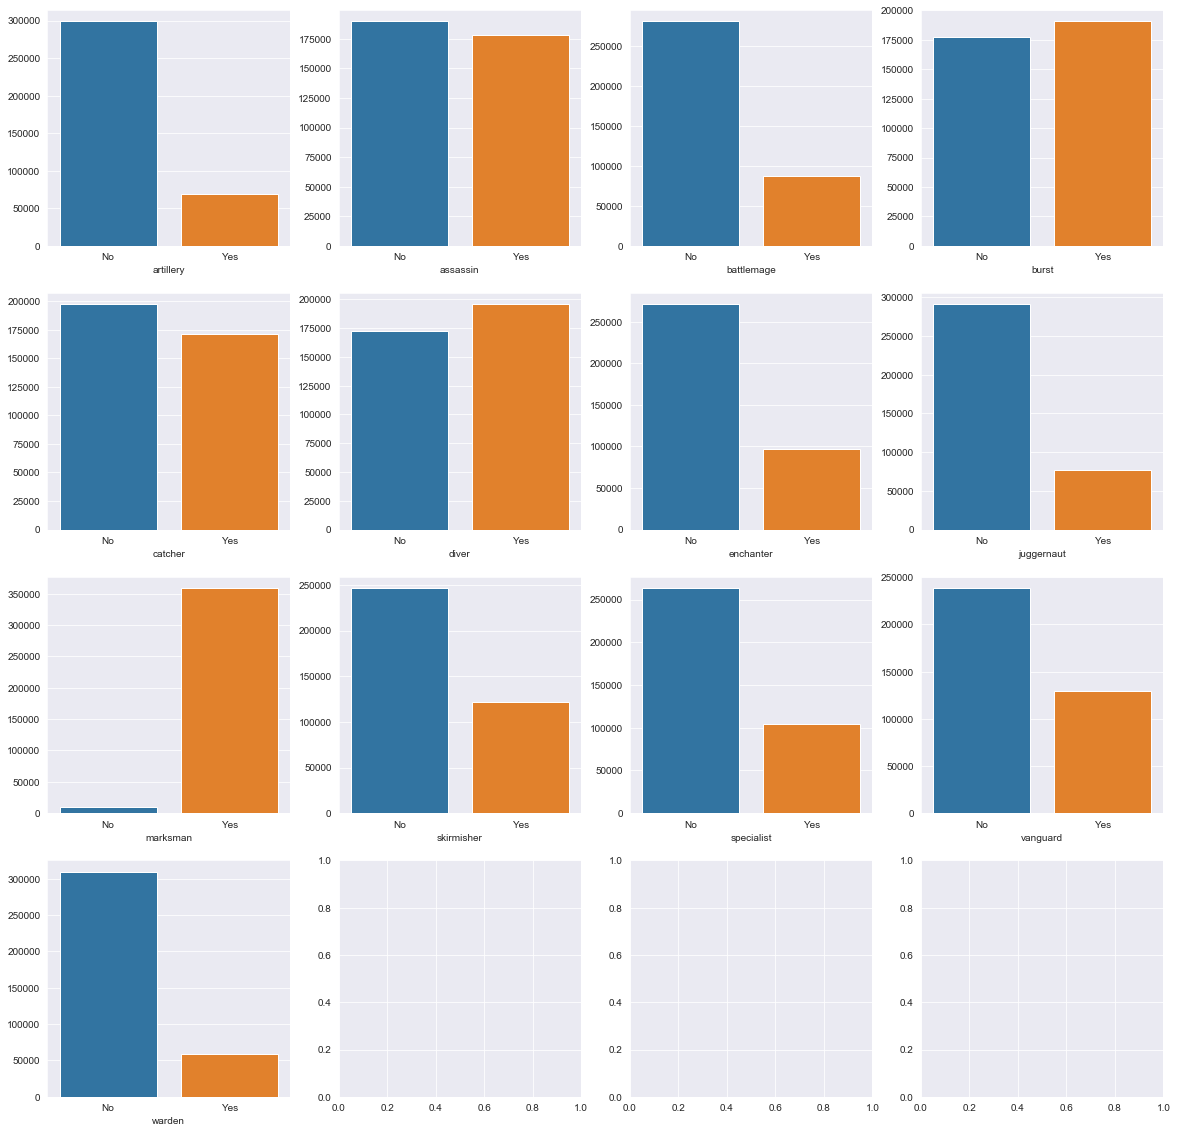

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
k = 0
j = 0
for item in classes:
    sns.countplot(teamdata[item].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes'],
                  ax=ax[k][j]);
    ax[k][j].set_ylabel('')
    j += 1
    if j == 4:
        k += 1
        j = 0

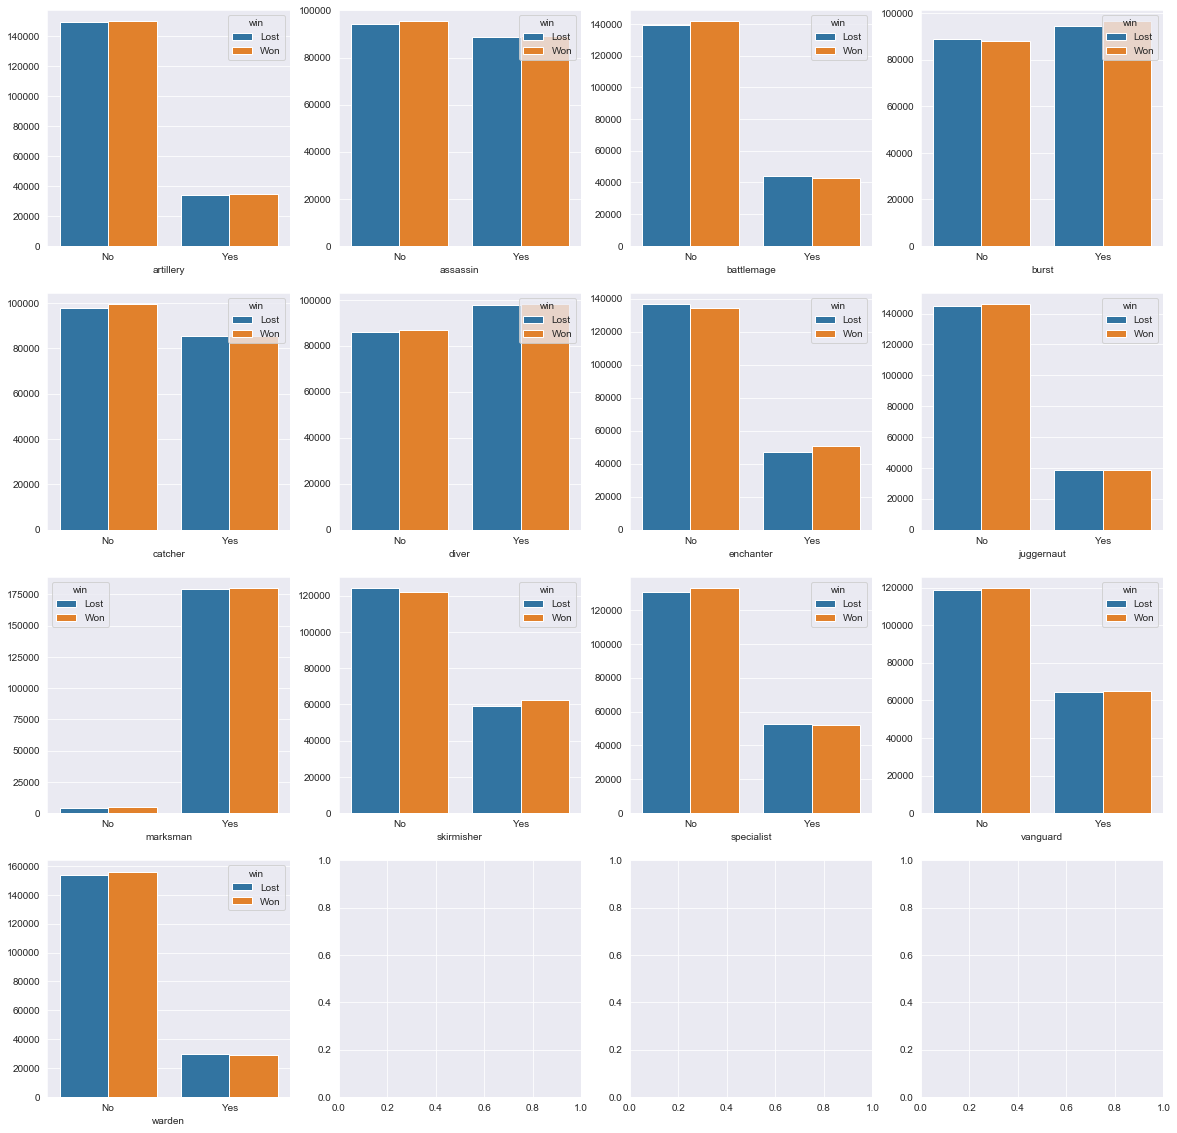

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
k = 0
j = 0
for item in classes:
    sns.countplot(teamdata[item].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes'],
                  hue=teamdata['win'].replace([0, 1], ['Lost', 'Won']), ax=ax[k][j]);
    ax[k][j].set_ylabel('')
    j += 1
    if j == 4:
        k += 1
        j = 0

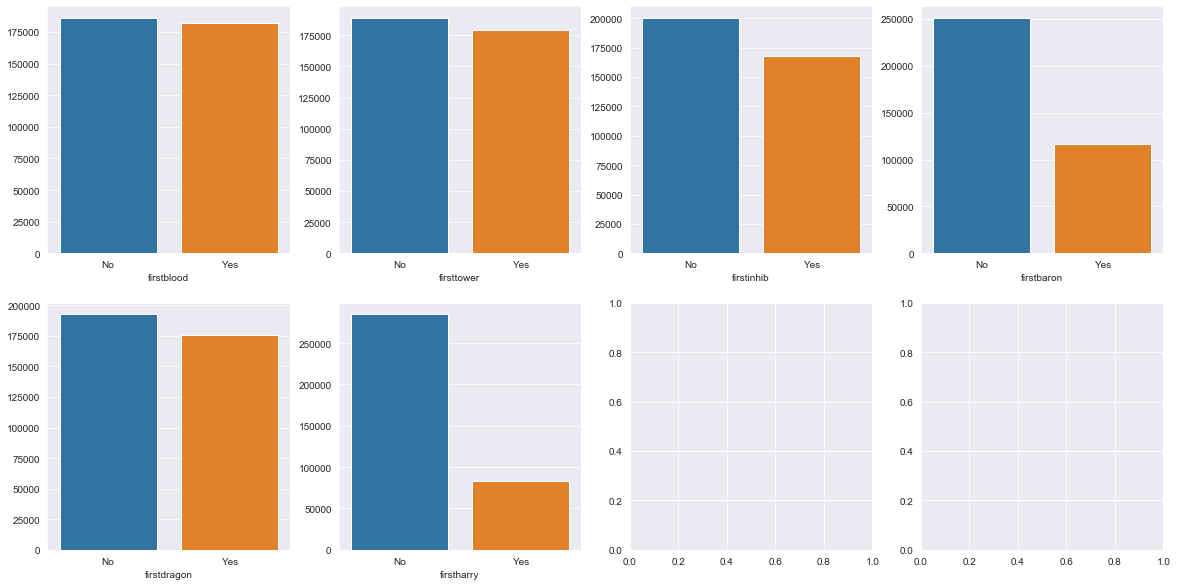

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
j = 0
for item in attributes:
    sns.countplot(teamdata[item].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes'],
                  ax=ax[k][j]);
    ax[k][j].set_ylabel('')
    j += 1
    if j == 4:
        k += 1
        j = 0

# Modelagem e Ajuste

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
booleans = classes+attributes

Definindo quatro modelos:
- Todas as variáveis
- Apenas variáveis booleanas (excluindo aqui total de torres/inibidores)
- Apenas variáveis de classes
- Apenas variáveis booleanas de início de jogo (excluindo tudo que não seja classes, primeiro abate e primeira torre

In [27]:
xtrain, xtest, ytrain, ytest = tts(teamdata.drop(columns='win'), teamdata['win'], test_size=0.25)
xtrainb, xtestb, ytrainb, ytestb = tts(teamdata[booleans], teamdata['win'], test_size=0.25)
xtrainc, xtestc, ytrainc, ytestc = tts(teamdata[classes], teamdata['win'], test_size=0.25)
xtraini, xtesti, ytraini, ytesti = tts(teamdata[booleans[:-4]], teamdata['win'], test_size=0.25)

## Regressão Logística

### Todas as variáveis

In [28]:
teammodel = LogisticRegression(random_state=19)
teammodel.fit(xtrain, ytrain)
ypred = teammodel.predict(xtest)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
confusion_matrix(ytest, ypred)

array([[41480,  4300],
       [ 4414, 41840]])

In [30]:
accuracy_score(ytest, ypred)

0.9053176000173849

### Todas as variáveis booleanas

In [31]:
teammodelb = LogisticRegression(random_state=19)
teammodelb.fit(xtrainb, ytrainb)
ypredb = teammodelb.predict(xtestb)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
confusion_matrix(ytestb, ypredb)

array([[41964,  3843],
       [ 7395, 38832]])

In [33]:
accuracy_score(ytestb, ypredb)

0.8778929526044723

### Apenas indicadores de classe

In [34]:
teammodelc = LogisticRegression(random_state=19)
teammodelc.fit(xtrainc, ytrainc)
ypredc = teammodelc.predict(xtestc)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
confusion_matrix(ytestc, ypredc)

array([[23629, 22193],
       [22785, 23427]])

In [36]:
accuracy_score(ytestc, ypredc)

0.5112893061259969

### Indicadores de classe e conquistas de começo de partida

In [37]:
teammodeli = LogisticRegression(random_state=19)
teammodeli.fit(xtraini, ytraini)
ypredi = teammodeli.predict(xtesti)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
confusion_matrix(ytesti, ypredi)

array([[33030, 12845],
       [14204, 31955]])

In [39]:
accuracy_score(ytesti, ypredi)

0.7060977464849947

## Árvore de Decisão

### Todas as variáveis booleanas

In [40]:
teamtreeb = DecisionTreeClassifier(min_samples_split=100, random_state=19)
teamtreeb.fit(xtrainb, ytrainb)
ypredb = teamtreeb.predict(xtestb)

In [41]:
confusion_matrix(ytestb, ypredb)

array([[41647,  4160],
       [ 7195, 39032]])

In [42]:
accuracy_score(ytestb, ypredb)

0.8766216832909577

### Apenas indicadores de classe

In [43]:
teamtreec = DecisionTreeClassifier(min_samples_leaf=100, random_state=19)
teamtreec.fit(xtrainc, ytrainc)
ypredc = teamtreec.predict(xtestc)

In [44]:
confusion_matrix(ytestc, ypredc)

array([[21372, 24450],
       [20575, 25637]])

In [45]:
accuracy_score(ytestc, ypredc)

0.5107786252906534

### Indicadores de classe e conquistas de começo de partida

In [46]:
teamtreei = DecisionTreeClassifier(min_samples_leaf=100, random_state=19)
teamtreei.fit(xtraini, ytraini)
ypredi = teamtreei.predict(xtesti)

In [47]:
confusion_matrix(ytesti, ypredi)

array([[33008, 12867],
       [14179, 31980]])

In [48]:
accuracy_score(ytesti, ypredi)

0.7061303431340592

## Floresta Randômica

In [49]:
teamforesti = RandomForestClassifier(100, min_samples_leaf=100, random_state=19)
teamforesti.fit(xtraini, ytraini)
ypredi = teamforesti.predict(xtesti)

In [50]:
confusion_matrix(ytesti, ypredi)

array([[33030, 12845],
       [14204, 31955]])

In [51]:
accuracy_score(ytesti, ypredi)

0.7060977464849947

A mudança para um modelo mais complexo não aumenta significativamente o resultado obtido.

# Avaliação dos dois times simultaneamente

Praticamente todos os passos anteriores de previsão são refeitos mas agora o dataset confronta dois times e informa qual venceu ao invés de analisar cada time individualmente.

In [52]:
blueteam = teamdata.iloc[[x for x in range(teamdata.shape[0]) if x%2 == 0]]
redteam = teamdata.iloc[[x for x in range(teamdata.shape[0]) if x%2 == 1]]

In [53]:
blueteam.columns = ['blue_'+col_name.lower() for col_name in blueteam.columns]
redteam.columns = ['red_'+col_name.lower() for col_name in redteam.columns]

In [54]:
blueteam.head()

,blue_win,blue_artillery,blue_assassin,blue_battlemage,blue_burst,blue_catcher,blue_diver,blue_enchanter,blue_juggernaut,blue_marksman,...,blue_firsttower,blue_firstinhib,blue_firstbaron,blue_firstdragon,blue_firstharry,blue_towerkills,blue_inhibkills,blue_baronkills,blue_dragonkills,blue_harrykills
absid,,,,,,,,,,,,,,,,,,,,,
10100,0,0,0,1,0,0,1,1,0,1,...,1,0,0,0,0,5,0,0,0,0
11100,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
12100,0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
13100,0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,1,6,0,0,2,1
14100,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,1,5,0,0,0,1


In [55]:
redteam.head()

,red_win,red_artillery,red_assassin,red_battlemage,red_burst,red_catcher,red_diver,red_enchanter,red_juggernaut,red_marksman,...,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills
absid,,,,,,,,,,,,,,,,,,,,,
10200,1,1,1,0,1,0,1,0,0,1,...,0,1,1,1,1,10,3,1,3,1
11200,1,0,0,0,1,0,1,0,0,1,...,1,1,0,1,0,10,3,0,2,0
12200,1,0,1,0,1,0,1,1,0,1,...,1,1,0,1,0,11,3,0,2,0
13200,1,0,0,0,1,1,0,0,0,1,...,0,1,1,0,0,9,2,1,2,0
14200,1,0,0,1,1,1,1,0,1,1,...,1,1,1,1,0,7,1,1,3,0


In [56]:
matchdata = pd.concat([blueteam.reset_index(drop=True),redteam.reset_index(drop=True)],
                      axis=1).drop(columns='red_win')
matchdata.head()

,blue_win,blue_artillery,blue_assassin,blue_battlemage,blue_burst,blue_catcher,blue_diver,blue_enchanter,blue_juggernaut,blue_marksman,...,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills
0,0,0,0,1,0,0,1,1,0,1,...,0,1,1,1,1,10,3,1,3,1
1,0,1,1,1,1,0,0,0,0,0,...,1,1,0,1,0,10,3,0,2,0
2,0,1,0,0,1,1,0,1,0,1,...,1,1,0,1,0,11,3,0,2,0
3,0,0,1,0,1,0,1,0,0,1,...,0,1,1,0,0,9,2,1,2,0
4,0,0,0,0,1,0,1,0,1,1,...,1,1,1,1,0,7,1,1,3,0


In [57]:
classes = ['blue_artillery', 'blue_assassin', 'blue_battlemage','blue_burst', 'blue_catcher', 'blue_diver',
           'blue_enchanter', 'blue_juggernaut', 'blue_marksman', 'blue_skirmisher', 'blue_specialist',
           'blue_vanguard', 'blue_warden', 'red_artillery', 'red_assassin', 'red_battlemage', 'red_burst',
           'red_catcher', 'red_diver', 'red_enchanter', 'red_juggernaut', 'red_marksman', 'red_skirmisher',
           'red_specialist', 'red_vanguard', 'red_warden']
attributes = ['blue_firstblood', 'blue_firsttower', 'blue_firstinhib', 'blue_firstbaron', 'blue_firstdragon',
              'blue_firstharry', 'red_firstblood', 'red_firsttower', 'red_firstinhib', 'red_firstbaron',
              'red_firstdragon', 'red_firstharry']

In [58]:
init = classes+attributes[:2]+attributes[6:8]

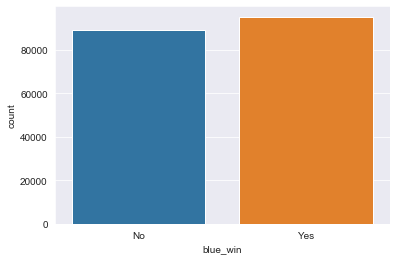

In [59]:
sns.countplot(matchdata['blue_win'].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes']);

In [60]:
xtrain, xtest, ytrain, ytest = tts(matchdata.drop(columns='blue_win'), matchdata['blue_win'], test_size=0.25)
xtrainc, xtestc, ytrainc, ytestc = tts(matchdata[classes], matchdata['blue_win'], test_size=0.25)
xtraini, xtesti, ytraini, ytesti = tts(matchdata[init], matchdata['blue_win'], test_size=0.25)

In [61]:
leaguemodel = LogisticRegression(random_state=19)
leaguemodel.fit(xtrain, ytrain)
ypred = leaguemodel.predict(xtest)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
confusion_matrix(ytest, ypred)

array([[21352,   807],
       [  852, 23006]])

In [63]:
accuracy_score(ytest, ypred)

0.9639481061346894

In [64]:
leaguemodelc = LogisticRegression(random_state=19)
leaguemodelc.fit(xtrainc, ytrainc)
ypredc = leaguemodelc.predict(xtestc)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
confusion_matrix(ytestc, ypredc)

array([[ 7347, 14802],
       [ 7007, 16861]])

In [66]:
accuracy_score(ytestc, ypredc)

0.5260664537018928

In [67]:
leaguemodeli = LogisticRegression(random_state=19)
leaguemodeli.fit(xtraini, ytraini)
ypredi = leaguemodeli.predict(xtesti)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
confusion_matrix(ytesti, ypredi)

array([[15478,  6707],
       [ 6592, 17240]])

In [69]:
accuracy_score(ytesti, ypredi)

0.7109981093943543

# Reclassificando personagens

### Raspagem e tratamento de dados

Os dados raspados aqui estão no dataset `champsstats.csv`.

Para obter o mesmo resultado ao fim dessa sessão basta utilizar o seguinte comando:

`df_champions2 = pd.read_csv('data/champsstats.csv')`

In [70]:
#df_champions2 = pd.read_csv('data/champsstats.csv')

In [122]:
import requests
from bs4 import BeautifulSoup as bs

In [123]:
response = requests.get('https://leagueoflegends.fandom.com/wiki/List_of_champions/Base_statistics')
response

<Response [200]>

In [124]:
soup = bs(response.content)

In [125]:
stats = soup.find_all('tr')[1:-3]

In [126]:
info = []
k = 0

for champ in stats:
    info.append([])
    for stat in champ.find_all('td'):
        info[k].append(stat.get_text()[1:-1])
    k += 1

In [127]:
df_champions2 = pd.DataFrame(info, columns=['name', 'hp', 'hp+', 'hp5', 'hp5+', 'mp', 'mp+', 'mp5', 'mp5+',
                                            'ad', 'ad+', 'as', 'as+', 'ar', 'ar+', 'mr', 'mr+', 'ms', 'rng'])

In [128]:
df_champions2['name'] = df_champions2['name'].apply(lambda name: name.split(' ')[0].replace('\'', '')
                                                    if name.split(' ')[0] == name.split(' ')[1]
                                                    else name.split(' ')[0]+' '+name.split(' ')[1])
df_champions2['name'] = df_champions2['name'].apply(lambda name: name.replace('. ', ''))

In [129]:
df_champions2.head()

,name,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng
0,Aatrox,580,+90,3,+1,0,+0,0,+0,60,+5,0.651,+2.5%,38,+3.25,32.1,+1.25,345,175
1,Ahri,526,+92,6.5,+0.6,418,+25,8,+0.8,53.04,+3,0.668,+2%,20.88,+3.5,30,+0.5,330,550
2,Akali,575,+95,8,+0.5,200,+0,50,+0,62.4,+3.3,0.625,+3.2%,23,+3.5,37,+1.25,345,125
3,Alistar,573.36,+106,8.5,+0.85,350,+40,8.5,+0.8,61.1116,+3.62,0.625,+2.125%,44,+3.5,32.1,+1.25,330,125
4,Amumu,613.12,+84,9,+0.85,287.2,+40,7.382,+0.525,53.38,+3.8,0.638,+2.18%,33,+3.8,32.1,+1.25,335,125


In [130]:
for column in df_champions2.columns[1:]:
    df_champions2[column] = df_champions2[column].apply(lambda x: float(x.strip('+%')))

In [71]:
df_champions2.head()

,name,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng
0,Aatrox,580.00,90.0,3.0,1.00,0.0,0.0,0.000,0.000,60.0000,5.00,0.651,2.500,38.00,3.25,32.1,1.25,345.0,175.0
1,Ahri,526.00,92.0,6.5,0.60,418.0,25.0,8.000,0.800,53.0400,3.00,0.668,2.000,20.88,3.50,30.0,0.50,330.0,550.0
2,Akali,575.00,95.0,8.0,0.50,200.0,0.0,50.000,0.000,62.4000,3.30,0.625,3.200,23.00,3.50,37.0,1.25,345.0,125.0
3,Alistar,573.36,106.0,8.5,0.85,350.0,40.0,8.500,0.800,61.1116,3.62,0.625,2.125,44.00,3.50,32.1,1.25,330.0,125.0
4,Amumu,613.12,84.0,9.0,0.85,287.2,40.0,7.382,0.525,53.3800,3.80,0.638,2.180,33.00,3.80,32.1,1.25,335.0,125.0


In [72]:
df_champions2.describe()

,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,556.350959,88.404110,6.621575,0.666096,308.427534,32.952055,8.439158,0.557021,59.351257,3.231758,0.636808,2.492993,30.073096,3.467808,31.166438,0.894178,336.356164,324.863014
std,35.380875,6.760513,1.762697,0.161665,116.991038,16.679776,8.357717,0.280759,6.204104,0.645140,0.044479,0.813023,6.737943,0.469657,1.659218,0.378678,7.568300,196.317780
min,400.000000,60.000000,2.500000,0.400000,0.000000,0.000000,0.000000,0.000000,40.368000,0.000000,0.200000,1.000000,17.040000,0.000000,25.000000,0.300000,315.000000,125.000000
25%,533.100000,85.000000,5.500000,0.550000,277.900000,25.000000,6.972000,0.412500,54.953425,3.000000,0.625000,2.000000,24.403000,3.262500,30.000000,0.500000,330.000000,125.000000
50%,563.240000,89.000000,7.000000,0.600000,325.000000,38.000000,7.720000,0.625000,60.000000,3.170800,0.636500,2.500000,30.000000,3.500000,32.000000,1.250000,335.000000,175.000000
75%,582.180000,92.000000,8.000000,0.750000,374.750000,43.750000,8.034000,0.800000,64.000000,3.500000,0.658000,3.000000,35.000000,3.750000,32.100000,1.250000,340.000000,525.000000
max,625.640000,112.000000,10.000000,1.750000,500.000000,67.000000,50.000000,1.000000,70.000000,5.000000,0.695000,6.000000,47.000000,5.000000,39.000000,1.500000,355.000000,650.000000


## Clusterização

Redefinindo cada personagem por um cluster ao invés das classes.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

É importante clusterizar apenas personagens que já existiam na época em que os dados foram colhidos.

In [74]:
df_champions2_usable = df_champions2.loc[df_champions2['name'].isin(names)]

In [75]:
scaler = StandardScaler()
scaler.fit(df_champions2_usable[df_champions2.columns[1:]])
df_champions2_scaled = pd.DataFrame(scaler.transform(df_champions2_usable[df_champions2.columns[1:]]),
                                    columns=df_champions2.columns[1:])

In [76]:
df_champions2_scaled.head()

,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng
0,0.672789,0.227994,-2.075962,2.039386,-2.579483,-1.929091,-0.985719,-1.951006,0.083776,3.004324,0.424107,0.012809,1.173705,-0.465661,0.634809,0.937545,1.115239,-0.745700
1,-0.865718,0.526223,-0.071585,-0.418564,0.959416,-0.442855,-0.051145,0.874721,-1.038209,-0.496400,1.078684,-0.608272,-1.391161,0.082643,-0.806944,-1.073562,-0.837845,1.176111
2,0.530335,0.973567,0.787434,-1.033051,-0.886230,-1.929091,4.855368,-1.951006,0.470667,0.028708,-0.577009,0.882321,-1.073549,0.082643,3.998900,0.937545,1.115239,-1.001941
3,0.483610,2.613828,1.073773,1.117655,0.383710,0.448886,0.007266,0.874721,0.262971,0.588824,-0.577009,-0.453001,2.072607,0.082643,0.634809,0.937545,-0.837845,-1.001941
4,1.616407,-0.666694,1.360113,1.117655,-0.147972,0.448886,-0.123341,-0.096622,-0.983399,0.903889,-0.076451,-0.384683,0.424620,0.740608,0.634809,0.937545,-0.186817,-1.001941


In [79]:
champions_cluster = KMeans(7, random_state=19)
champions_cluster.fit(df_champions2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=19, tol=0.0001, verbose=0)

In [80]:
df_champions2_usable['cluster'] = champions_cluster.labels_
df_champions2_usable.head()

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,hp,hp+,hp5,hp5+,mp,mp+,mp5,mp5+,ad,ad+,as,as+,ar,ar+,mr,mr+,ms,rng,cluster
0,Aatrox,580.00,90.0,3.0,1.00,0.0,0.0,0.000,0.000,60.0000,5.00,0.651,2.500,38.00,3.25,32.1,1.25,345.0,175.0,2
1,Ahri,526.00,92.0,6.5,0.60,418.0,25.0,8.000,0.800,53.0400,3.00,0.668,2.000,20.88,3.50,30.0,0.50,330.0,550.0,4
2,Akali,575.00,95.0,8.0,0.50,200.0,0.0,50.000,0.000,62.4000,3.30,0.625,3.200,23.00,3.50,37.0,1.25,345.0,125.0,5
3,Alistar,573.36,106.0,8.5,0.85,350.0,40.0,8.500,0.800,61.1116,3.62,0.625,2.125,44.00,3.50,32.1,1.25,330.0,125.0,0
4,Amumu,613.12,84.0,9.0,0.85,287.2,40.0,7.382,0.525,53.3800,3.80,0.638,2.180,33.00,3.80,32.1,1.25,335.0,125.0,3


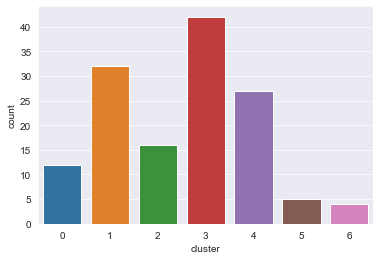

In [81]:
sns.countplot(df_champions2_usable['cluster']);

Verificando quais campeões estão em cada cluster.

In [82]:
df_champions2_usable[df_champions2_usable['cluster'] == 0]['name'].unique()

array(['Alistar', 'Blitzcrank', 'Darius', 'Galio', 'Illaoi', 'Irelia',
       'Ornn', 'Sejuani', 'Skarner', 'Udyr', 'Urgot', 'Yorick'],
      dtype=object)

In [83]:
df_champions2_usable[df_champions2_usable['cluster'] == 1]['name'].unique()

array(['Ashe', 'Bard', 'Corki', 'Draven', 'Elise', 'Ezreal', 'Janna',
       'Jayce', 'Jhin', 'Jinx', 'Kalista', 'Karma', 'Kassadin', 'Kayle',
       'Kindred', 'KogMaw', 'Lucian', 'Lulu', 'Miss Fortune', 'Morgana',
       'Nami', 'Nidalee', 'Quinn', 'Sivir', 'Sona', 'Soraka', 'Teemo',
       'Tristana', 'Twitch', 'Varus', 'Vayne', 'Xayah'], dtype=object)

In [84]:
df_champions2_usable[df_champions2_usable['cluster'] == 2]['name'].unique()

array(['Aatrox', 'DrMundo', 'Garen', 'Katarina', 'Kled', 'Mordekaiser',
       'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Shyvana',
       'Tryndamere', 'Vladimir', 'Yasuo', 'Zac'], dtype=object)

In [85]:
df_champions2_usable[df_champions2_usable['cluster'] == 3]['name'].unique()

array(['Amumu', 'Braum', 'Camille', 'ChoGath', 'Diana', 'Ekko', 'Evelynn',
       'Fiora', 'Fizz', 'Gangplank', 'Gragas', 'Hecarim', 'Ivern',
       'Jarvan IV', 'Jax', 'Kayn', 'KhaZix', 'Leona', 'Malphite',
       'Maokai', 'Master Yi', 'Nasus', 'Nautilus', 'Nocturne', 'Nunu',
       'Olaf', 'Pantheon', 'Poppy', 'Rakan', 'Rammus', 'Shaco', 'Singed',
       'Sion', 'Tahm Kench', 'Talon', 'Taric', 'Trundle', 'Vi',
       'Volibear', 'Warwick', 'Wukong', 'Xin Zhao'], dtype=object)

In [86]:
df_champions2_usable[df_champions2_usable['cluster'] == 4]['name'].unique()

array(['Ahri', 'Anivia', 'Annie', 'Aurelion Sol', 'Azir', 'Brand',
       'Cassiopeia', 'Fiddlesticks', 'Heimerdinger', 'Karthus', 'LeBlanc',
       'Lissandra', 'Lux', 'Malzahar', 'Orianna', 'Ryze', 'Swain',
       'Syndra', 'Taliyah', 'Twisted Fate', 'Veigar', 'VelKoz', 'Viktor',
       'Xerath', 'Ziggs', 'Zilean', 'Zyra'], dtype=object)

In [87]:
df_champions2_usable[df_champions2_usable['cluster'] == 5]['name'].unique()

array(['Akali', 'Kennen', 'Lee Sin', 'Shen', 'Zed'], dtype=object)

In [88]:
df_champions2_usable[df_champions2_usable['cluster'] == 6]['name'].unique()

array(['Caitlyn', 'Gnar', 'Graves', 'Thresh'], dtype=object)

In [89]:
df_champions2_usable.to_csv('data/champscluster.csv', index=False)

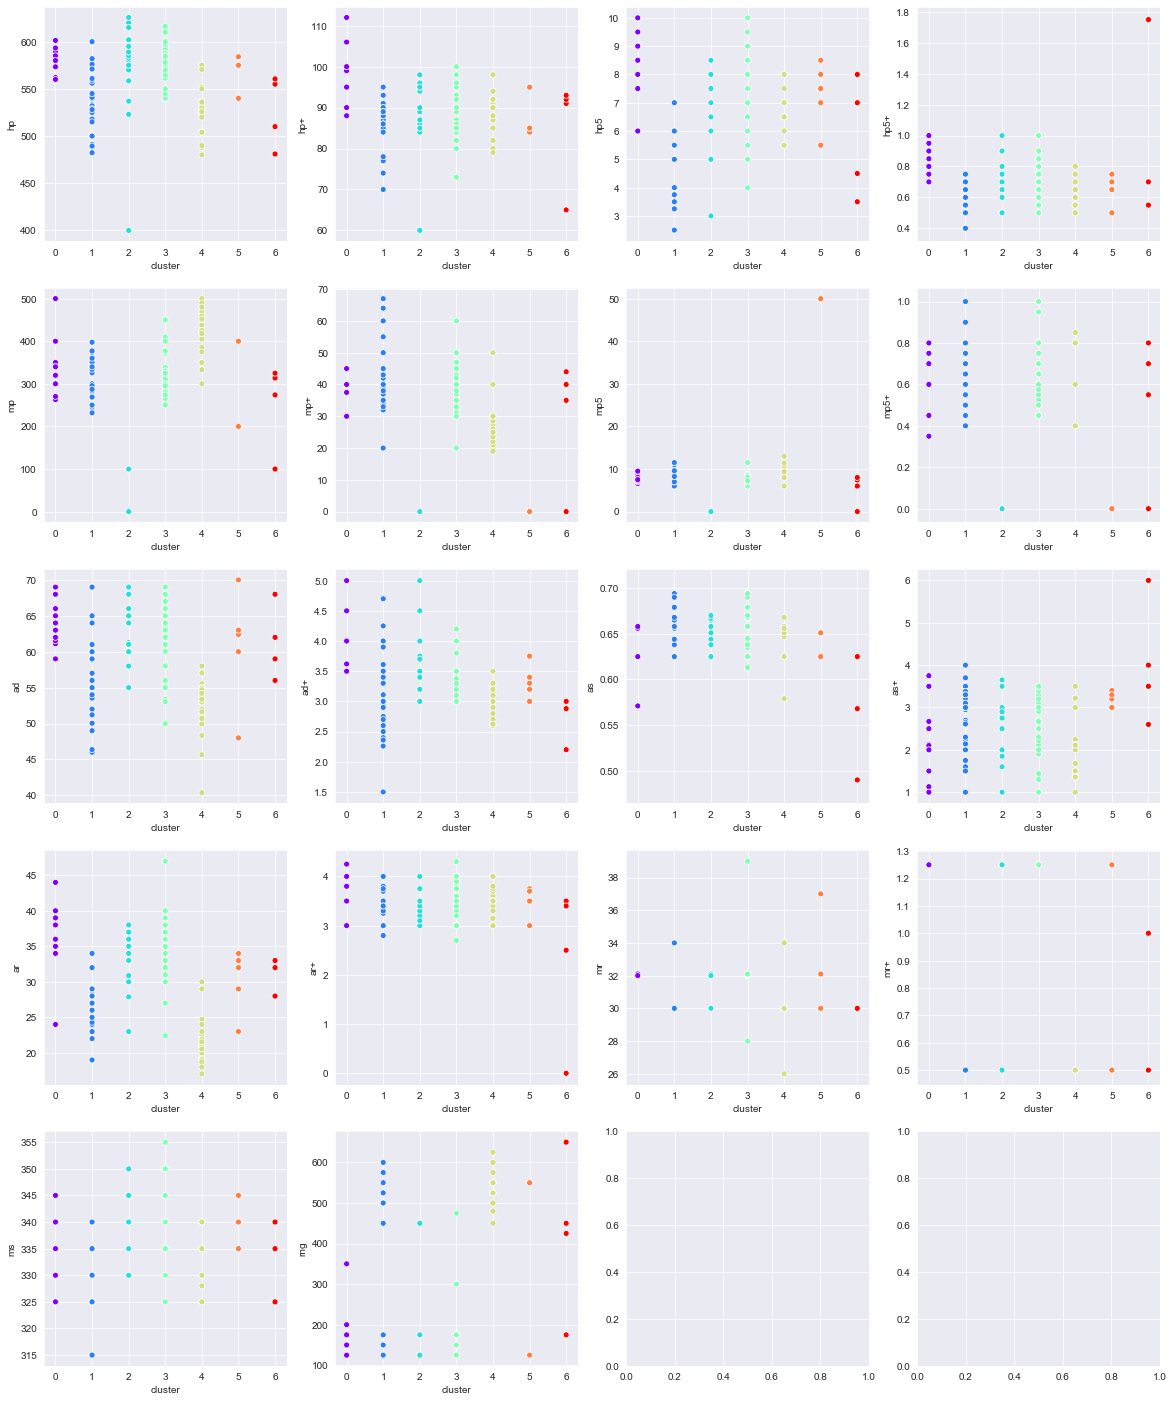

In [90]:
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
k = 0
j = 0

for item in df_champions2_usable.columns[1:-1]:
    sns.scatterplot(df_champions2_usable['cluster'], df_champions2_usable[item],
                    df_champions2_usable['cluster'], palette='rainbow', legend=False, ax=ax[k][j]);
    j += 1
    if j == 4:
        k += 1
        j = 0

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(2).fit_transform(df_champions2_scaled)

In [93]:
df = pd.DataFrame(pca)
df.head()

,0,1
0,-3.474382,2.613711
1,2.772543,-0.252142
2,-3.042331,1.561457
3,-2.023635,-2.611973
4,-1.852340,-1.090224


In [94]:
df['cluster'] = df_champions2_usable['cluster']

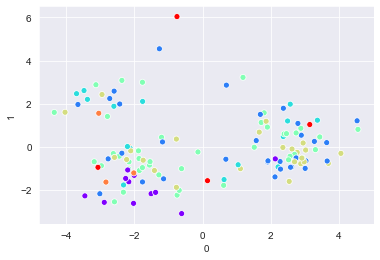

In [95]:
sns.scatterplot(df[0], df[1], df['cluster'], palette='rainbow', legend=False);

### Mescla de datasets

Como os dados já foram anteriormente tratados basta apenas mesclar com o que já existe.

In [96]:
championsdata2 = df_champions2_usable.set_index('name')[['cluster']].join(championsdata.reset_index().set_index('name')['id'])

In [97]:
championsdata2 = championsdata2.join(championsdata2['cluster'].apply(lambda x: str(x)).str.get_dummies())
championsdata2.head()

,cluster,id,0,1,2,3,4,5,6
name,,,,,,,,,
Aatrox,2,266,0,0,1,0,0,0,0
Ahri,4,103,0,0,0,0,1,0,0
Akali,5,84,0,0,0,0,0,1,0
Alistar,0,12,1,0,0,0,0,0,0
Amumu,3,32,0,0,0,1,0,0,0


In [98]:
playerdata2 = playerdata.set_index('name')[['win', 'absid']].join(championsdata2)
playerdata2.head()

,win,absid,cluster,id,0,1,2,3,4,5,6
name,,,,,,,,,,,
Aatrox,1.0,92100,2,266,0,0,1,0,0,0,0
Aatrox,0.0,186200,2,266,0,0,1,0,0,0,0
Aatrox,0.0,205200,2,266,0,0,1,0,0,0,0
Aatrox,1.0,244200,2,266,0,0,1,0,0,0,0
Aatrox,1.0,252100,2,266,0,0,1,0,0,0,0


In [99]:
teamdata2 = playerdata2.groupby('absid').sum().drop(columns='id')
teamdata2 = teamdata2.join(df_teamstats.drop(columns=['matchid', 'teamid'])).drop(columns='cluster')
teamdata2.head()

,win,0,1,2,3,4,5,6,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
absid,,,,,,,,,,,,,,,,,,,
10100,0.0,0,2,0,2,1,0,0,0,1,0,0,0,0,5,0,0,0,0
10200,5.0,2,1,0,0,2,0,0,1,0,1,1,1,1,10,3,1,3,1
11100,0.0,0,0,1,1,3,0,0,1,0,0,0,0,0,2,0,0,0,0
11200,5.0,0,1,0,2,1,0,1,0,1,1,0,1,0,10,3,0,2,0
12100,0.0,0,3,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [100]:
for item in range(0, 7):
    teamdata2[str(item)] = teamdata2[str(item)].apply(lambda x: 1 if x > 0 else 0)

teamdata2['win'] = teamdata2['win'].apply(lambda x: 1 if x > 0 else 0)
teamdata2.head()

,win,0,1,2,3,4,5,6,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
absid,,,,,,,,,,,,,,,,,,,
10100,0,0,1,0,1,1,0,0,0,1,0,0,0,0,5,0,0,0,0
10200,1,1,1,0,0,1,0,0,1,0,1,1,1,1,10,3,1,3,1
11100,0,0,0,1,1,1,0,0,1,0,0,0,0,0,2,0,0,0,0
11200,1,0,1,0,1,1,0,1,0,1,1,0,1,0,10,3,0,2,0
12100,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0


# Visualização de Dados

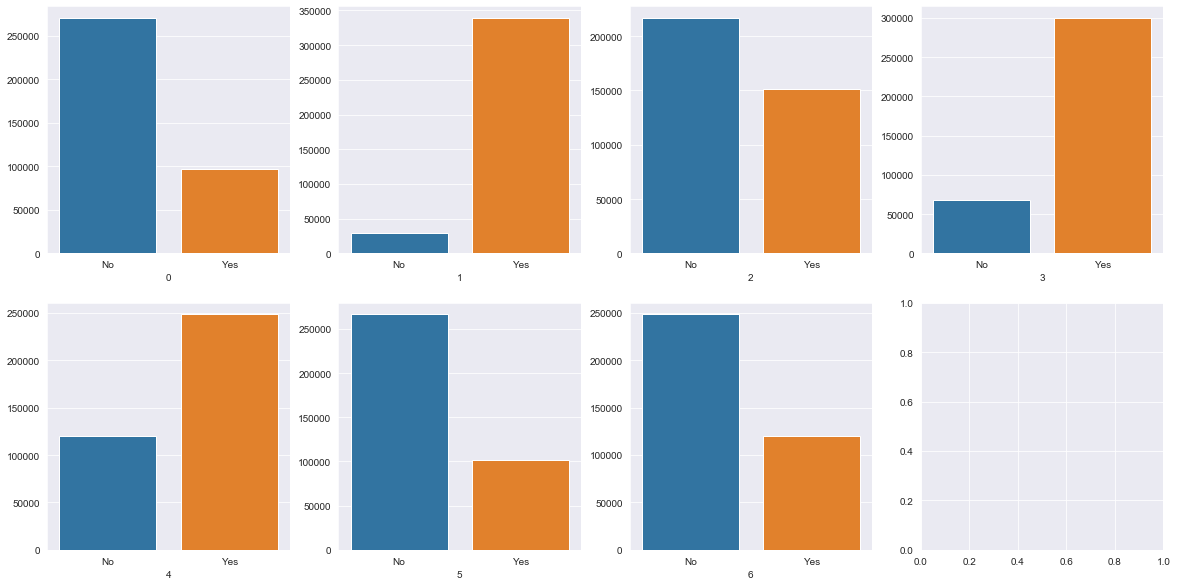

In [101]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
j = 0
for item in range(0, 7):
    sns.countplot(teamdata2[str(item)].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes'],
                  ax=ax[k][j]);
    ax[k][j].set_ylabel('')
    j += 1
    if j == 4:
        k += 1
        j = 0

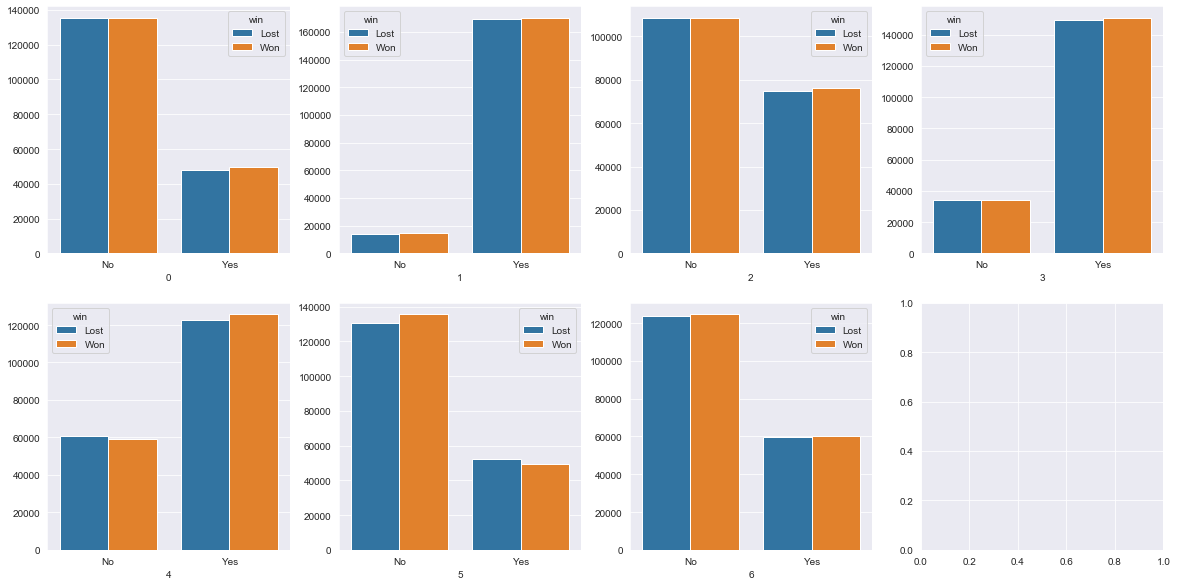

In [102]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
j = 0
for item in range(0, 7):
    sns.countplot(teamdata2[str(item)].replace([0, 1], ['No', 'Yes']), order=['No', 'Yes'],
                  hue=teamdata2['win'].replace([0, 1], ['Lost', 'Won']), ax=ax[k][j]);
    ax[k][j].set_ylabel('')
    j += 1
    if j == 4:
        k += 1
        j = 0

# Modelagem e Ajuste

Repetindo o que já foi realizado antes para as novas classificações.

In [103]:
clusters = [str(x) for x in range(0, 7)]
attributes = ['firstblood', 'firsttower', 'firstinhib', 'firstbaron', 'firstdragon', 'firstharry']
booleans = clusters+attributes

In [104]:
xtrainb, xtestb, ytrainb, ytestb = tts(teamdata2[booleans], teamdata2['win'], test_size=0.25)
xtrainc, xtestc, ytrainc, ytestc = tts(teamdata2[clusters], teamdata2['win'], test_size=0.25)
xtraini, xtesti, ytraini, ytesti = tts(teamdata2[booleans[:-4]], teamdata2['win'], test_size=0.25)

## Regressão Logística

### Todas as variáveis booleanas

In [105]:
teammodelb = LogisticRegression(random_state=19)
teammodelb.fit(xtrainb, ytrainb)
ypredb = teammodelb.predict(xtestb)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
confusion_matrix(ytestb, ypredb)

array([[42134,  3831],
       [ 7265, 38804]])

In [107]:
accuracy_score(ytestb, ypredb)

0.8794358606601907

### Apenas indicadores de classe

In [108]:
teammodelc = LogisticRegression(random_state=19)
teammodelc.fit(xtrainc, ytrainc)
ypredc = teammodelc.predict(xtestc)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
confusion_matrix(ytestc, ypredc)

array([[15539, 30336],
       [14998, 31161]])

In [110]:
accuracy_score(ytestc, ypredc)

0.5074211704370124

### Indicadores de classe e conquistas de começo de partida

In [111]:
teammodeli = LogisticRegression(random_state=19)
teammodeli.fit(xtraini, ytraini)
ypredi = teammodeli.predict(xtesti)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
confusion_matrix(ytesti, ypredi)

array([[33143, 12643],
       [14147, 32101]])

In [113]:
accuracy_score(ytesti, ypredi)

0.7089119238542277